In [1]:
# line profiler example 1

import numpy as np

def appendifnot(arr, x):
    if not x in arr:
        arr.append(x)
    
def useless():
    arr = list()
    for i in range(10000):
        x = np.random.randint(0,10000)
        appendifnot(arr, x)

In [3]:
# line profiler via python
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(useless)
lp.add_function(appendifnot)
lp.runctx('useless()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 1e-06 s

Total time: 0.32515 s
File: <ipython-input-1-0f87f809430a>
Function: appendifnot at line 5

Line #      Hits         Time  Per Hit   % Time  Line Contents
     5                                           def appendifnot(arr, x):
     6     10000       322030     32.2     99.0      if not x in arr:
     7      6286         3120      0.5      1.0          arr.append(x)

Total time: 0.363336 s
File: <ipython-input-1-0f87f809430a>
Function: useless at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           def useless():
    10         1            1      1.0      0.0      arr = list()
    11     10001         3158      0.3      0.9      for i in range(10000):
    12     10000        24197      2.4      6.7          x = np.random.randint(0,10000)
    13     10000       335980     33.6     92.5          appendifnot(arr, x)



In [4]:
# line profiler via cell magics 
%reload_ext line_profiler
%lprun -f useless useless()

In [7]:
# ipyparallel example

import time
import sys
from ipyparallel import Client
from IPython.display import clear_output, display
from IPython.html import widgets

rc= Client()
view = rc.load_balanced_view()

#@parallel(view, block=True)
def f(x):
    import time
    time.sleep(0.1)
    return x * x

numbers = list(range(20))
rc.ids

/Users/graham/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Waiting for connection file: ~/.ipython/profile_default/security/ipcontroller-client.json


OSError: Connection file '~/.ipython/profile_default/security/ipcontroller-client.json' not found.
You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

In [ ]:
ar = view.map_async(f, numbers)  # run it

In [ ]:
print(ar.metadata[0])  # print results
for val in ar:
    print(val, end=', ')

In [8]:
%%px  # cell magic to run in parallel
print('qwe')

ERROR:root:Cell magic `%%px` not found.


In [9]:
# calculate pi in cpython and time it

def calc_pi_cpython(n):
    start_time = time()
    delta = 1 / n
    summ = 0.0
    for i in range (1, n+1):
        x = (i - 0.5) * delta
        summ += 1 / (1 + x * x)
    pi = 4 * delta * summ
    return (pi, time() - start_time )

In [10]:
# calculate pi using numba and time it

from time import time
from numba import jit

@jit
def calc_pi_numba(n):
    start_time = time()
    delta = 1 / n
    summ = 0.0
    for i in range (1, n+1):
        x = (i - 0.5) * delta
        summ += 1 / (1 + x * x)
    pi = 4 * delta * summ
    return (pi, time() - start_time )

In [11]:
%load_ext Cython

In [12]:
%%cython
# calculate pi using cython and time it

cimport cython
from time import time

@cython.boundscheck(False) 
@cython.wraparound(False)
cpdef calc_pi_cython(n):
    cdef unsigned long start_time, i
    cdef double delta, summ, x, pi
    start_time = time()
    delta = 1 / n
    summ = 0.0
    for i in range (1, n+1):
        x = (i - 0.5) * delta
        summ += 1 / (1 + x * x)
    pi = 4 * delta * summ
    return (pi, time() - start_time )

In [13]:
n = 10000000
pi, duration = calc_pi_cpython(n)
print('CPython Pi=%s, time=%s' % (pi, duration))

pi, duration = calc_pi_numba(n)
print('Numba Pi=%s, time=%s' % (pi, duration)) 

pi, duration = calc_pi_cython(n)
print('Cython Pi=%s, time=%s' % (pi, duration))

#%timeit pi = calc_pi_cpython(n)
%timeit pi = calc_pi_numba(n)
%timeit pi = calc_pi_cython(n)

CPython Pi=3.141592653589731, time=1.360976219177246
Numba Pi=3.141592653589731, time=0.05402183532714844
Cython Pi=3.141592653589731, time=0.6495518684387207
100 loops, best of 3: 11.1 ms per loop
100 loops, best of 3: 14.7 ms per loop


In [14]:
%%html 
<style>table {float:left}</style>

<h2 align="center">Bayes Theorem</h2> 

\begin{align}
P(A/B) = \frac{P(A) * P(B/A)}{ P(B) }
\end{align}

In [15]:
# bayes theorem example with 1% of people being a drug user, and drug test accuracy of 99%
# P(A) = P(being drug user) = 1%, P(B) = probability of positive test, P(B/A) = P(positive test given being drug user)
accuracy = 0.99
usage = 0.01
prob = usage * accuracy / (accuracy * usage + (1 - accuracy) * (1 - usage))
print('prob of being drug user given that tested positive %0.4f' % prob)

prob of being drug user given that tested positive 0.5000


[click here for google](http://www.google.com)

![here is a picture](https://www.python.org/static/img/python-logo.png)

<img src=https://www.python.org/static/img/python-logo.png width=150  alt=here is a pic/>


*in italics*
**in Bold**
***in bold and italics***


| heading 1  | heading 2 | heading 3 | heading 1  | heading 2 | heading 3 |
|------------|-----------|-----------|------------|-----------|-----------|
| content 1  | content 1 | content 1 | content 1  | content 1 | content 1 |
| content 1  | content 1 | content 1 | content 1  | content 1 | content 1 |


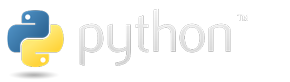

In [16]:
from IPython.display import Image
Image('https://www.python.org/static/img/python-logo.png', width=200)

In [17]:
# testing in ipython

def foo(data):
    return data

# import pytest # note doesnt work from iPython
import unittest
import sys

class Tests(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        print('started class')
        
    @classmethod
    def tearDownClass(cls):
        print('ended class')
        
    def setUp(self):
        print('started test')
        self.data1 = 4
        self.data2 = 4.1
        
    def tearDown(self):
        print('ended test')
    
    def test_value(self):
        self.assertEqual(foo(self.data1), self.data1)
        
    def test_type(self):
        self.assertIs(type(foo(self.data1)), int)
        
    def test_bool(self):
        self.assertFalse(foo(self.data2) == self.data1)
        
    def test_exception(self):
        with self.assertRaises(TypeError):
            foo(self.data1, self.data2)

tests = unittest.TestLoader().loadTestsFromTestCase( Tests )
unittest.TextTestRunner(verbosity=1,stream=sys.stderr).run( tests )

#assertEqual(a, b)	a == b
#assertNotEqual(a, b)	a != b
#assertTrue(x)	bool(x) is True
#assertFalse(x)	bool(x) is False
#assertIs(a, b)	a is b
#assertIsNot(a, b)	a is not b
#assertIsNone(x)	x is None
#assertIsNotNone(x)	x is not None
#assertIn(a, b)	a in b
#assertNotIn(a, b)	a not in b
#assertIsInstance(a, b)	isinstance(a, b)
#assertNotIsInstance(a, b)	not isinstance(a, b)

#assertRaises(exc, fun, *args, **kwds)	fun(*args, **kwds) raises exc 
#assertRaisesRegex(exc, r, fun, *args, **kwds)	fun(*args, **kwds) raises exc and the message matches regex r
#assertWarns(warn, fun, *args, **kwds)	fun(*args, **kwds) raises warn
#assertWarnsRegex(warn, r, fun, *args, **kwds)	fun(*args, **kwds) raises warn and the message matches regex r
#assertLogs(logger, level)	The with block logs on logger with minimum level

#assertAlmostEqual(a, b)	round(a-b, 7) == 0
#assertNotAlmostEqual(a, b)	round(a-b, 7) != 0 
#assertGreater(a, b)	a > b
#assertGreaterEqual(a, b)	a >= b
#assertLess(a, b)	a < b
#assertLessEqual(a, b)	a <= b
#assertRegex(s, r)	r.search(s)
#assertNotRegex(s, r)	not r.search(s)
#assertCountEqual(a, b)	a and b have the same elements in the same number, regardless of their order

#assertMultiLineEqual(a, b)	strings
#assertSequenceEqual(a, b)	sequences
#assertListEqual(a, b)	lists
#assertTupleEqual(a, b)	tuples
#assertSetEqual(a, b)	sets or frozensets
#assertDictEqual(a, b)	dicts

....

started class
started test
ended test
started test
ended test
started test
ended test
started test
ended test
ended class



----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [18]:
# logging example for long processes

import logging
from datetime import datetime
def start_logger():
    logging.basicConfig(filename='test_%s.log' % datetime.strftime(datetime.now(),'%Y%m%d_%H%M%S'),
                        level=logging.DEBUG,
                        format='%(asctime)s %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')
    return None

start_logger()
logging.debug("A useless log message")

In [19]:
#  emailing from python, with attached file

# BTW config files should look like:
#[email]
#user=gchester99@gmail.com
#password=hudson-99

import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email import encoders
import os
import configparser

def get_config(env):
    config = configparser.ConfigParser()
    if env == 'TEST':
        config.read(['test.cfg,'])
    elif env == 'PROD':
        config.read(['prod.cfg'])
    else:
        config.read(['dev.cfg'])
    return config

def mail(to, subject, text, attach=None, config=None):
    if not config:
        config = get_config('DEV')
    msg = MIMEMultipart()
    msg['From'] = config.get('email','user')
    msg['To'] = ", ".join(to)
    msg['Subject'] = subject
    msg.attach(MIMEText(text))
    if attach:
        part = MIMEBase('application','octet-stream')
        part.set_payload( open(attach, 'rb').read() )
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', 'attachment; filename="%s"' % os.path.basename(attach))
        msg.attach(part)
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
    server.ehlo()
    server.login(config.get('email','user'), config.get('email', 'password'))
    server.sendmail(config.get('email','user'), to, msg.as_string())
    server.close()

mail(to=['chesters99@yahoo.com'], subject='test from iPython', text='nothing to say', attach='README.rst')


NoSectionError: No section: 'email'

In [20]:
import threading
import time

class Mythread(threading.Thread):
    def __init__(self, threadid, name, counter):
        threading.Thread.__init__(self)
        self. threadid = threadid
        self.name = name
        self.counter = counter
    
    def run(self):
        print("Starting" + self.name)
#        threadLock.acquire()
        print_time(self.name, self.counter, 5)
#        threadLock.release()
        print("Exiting " + self.name)

def print_time(threadname, delay, counter):
    while counter:
        if exitflag:
            threadname.exit()
        time.sleep(delay)
        print ("%s %s" % (threadname, time.ctime(time.time())))
        counter -= 1

exitflag = 0        
threadLock = threading.Lock()

thread1= Mythread(1,'Thread-1',1)
thread2= Mythread(2,'Thread-2',2)

thread1.start()
thread2.start()

thread1.join()
thread2.join()

print("exiting main thread")

StartingThread-1
StartingThread-2
Thread-1 Mon Jul 31 16:20:38 2017
Thread-2 Mon Jul 31 16:20:39 2017
Thread-1 Mon Jul 31 16:20:39 2017
Thread-1 Mon Jul 31 16:20:40 2017
Thread-2 Mon Jul 31 16:20:41 2017
Thread-1 Mon Jul 31 16:20:41 2017
Thread-1 Mon Jul 31 16:20:42 2017
Exiting Thread-1
Thread-2 Mon Jul 31 16:20:43 2017
Thread-2 Mon Jul 31 16:20:45 2017
Thread-2 Mon Jul 31 16:20:47 2017exiting main thread

Exiting Thread-2


In [21]:
#socket server
import socket

s=socket.socket()
host = socket.gethostname()
print(' server starting on ' + host)
port=12345
s.bind((host, port))

s.listen(5)
while True:
    c, addr = s.accept()
    print("got connection from " + str(addr))
    c.send(b'thanks for connecting')
    c.close()

 server starting on Grahams-iMac


KeyboardInterrupt: 

In [ ]:
# socket client needs to run from seperate workbook as ipython is single threaded
import socket

s=socket.socket()
host = socket.gethostname()
print('client starting on ' + host)
port=12345
s.connect((host, port))
print(s.recv(1024))
s.close()
print('client done on ' + host)

In [22]:
import asyncio, datetime

async def display_date(loop):
    end_time = loop.time() + 5.0
    while True:
        print(datetime.datetime.now())
        if (loop.time() + 1.0) >= end_time:
            break
        await asyncio.sleep(1)

loop = asyncio.get_event_loop()
loop.run_until_complete(display_date(loop))
#loop.close()

2017-07-31 16:21:40.973115
2017-07-31 16:21:41.976191
2017-07-31 16:21:42.976459
2017-07-31 16:21:43.976901
2017-07-31 16:21:44.979931


In [23]:
# install cprofile grapher
!pip install snakeviz
%load_ext snakeviz

    100% |████████████████████████████████| 174kB 2.7MB/s ta 0:00:01


In [24]:
# try out CProfiler
import time

def another():
    for x in range(1000000):
        z = x * x
    print('another func done')

def myfunction():
    for i in range(5):
        another()
        print('bing %i' % (i))
        for j in range(5000000):
            y = i * i

In [25]:
import cProfile
profiler = cProfile.Profile()
profiler.runcall(myfunction)
profiler.print_stats()

another func done
bing 0
another func done
bing 1
another func done
bing 2
another func done
bing 3
another func done
bing 4
         285 function calls in 1.063 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.213    0.043    0.213    0.043 <ipython-input-24-1ada111a7d6c>:4(another)
        1    0.849    0.849    1.063    1.063 <ipython-input-24-1ada111a7d6c>:9(myfunction)
       24    0.000    0.000    0.001    0.000 iostream.py:180(schedule)
       20    0.000    0.000    0.000    0.000 iostream.py:284(_is_master_process)
       20    0.000    0.000    0.000    0.000 iostream.py:297(_schedule_flush)
       20    0.000    0.000    0.001    0.000 iostream.py:342(write)
       24    0.000    0.000    0.000    0.000 iostream.py:87(_event_pipe)
       24    0.000    0.000    0.000    0.000 threading.py:1062(_wait_for_tstate_lock)
       24    0.000    0.000    0.000    0.000 threading.py:1104(is_alive)
       24

In [26]:
%prun -T prun.prof myfunction()

another func done
bing 0
another func done
bing 1
another func done
bing 2
another func done
bing 3
another func done
bing 4
 
*** Profile printout saved to text file 'prun.prof'. 


In [27]:
%snakeviz myfunction()

another func done
bing 0
another func done
bing 1
another func done
bing 2
another func done
bing 3
another func done
bing 4
 
*** Profile stats marshalled to file '/var/folders/yx/v99n_ffj5qq5bgbxbn9yl2_40000gn/T/tmp5d2spdka'. 


In [28]:
# line profiler (original install from wheel to avoid windows c compile problems)

%reload_ext line_profiler
%lprun -f myfunction myfunction()

another func done
bing 0
another func done
bing 1
another func done
bing 2
another func done
bing 3
another func done
bing 4


In [29]:
from ipywidgets import interact

@interact
def echo(input='Hi', times=[1,5,1]):
    return (input + " ") * times

In [ ]:
# jupyter nbconvert "data science tinkering.ipynb" --to slides --post serve